<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-01-03-glm-logistic-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# **Logistic Regression Model (Binary Classification)**


This tutorial will focus on implementing a logistic regression model in R, a powerful open-source statistical software that provides numerous functions for easily fitting, interpreting, and visualizing these models. We will begin by reviewing the fundamentals of logistic models, which include understanding their structure, key components, and the types of data they are best suited to handle.

My approach will be step-by-step, starting with constructing a logistic model using synthetic data without relying on any built-in R packages. We will then demonstrate how to fit a logistic model using R's built-in functions (`glm`), interpret the model outputs, per and visualize the results using different R packages.


## Overview

Logistic regression is a statistical method useful in scenarios where the categorical outcome variable has only two possible classes. It is a binary classification method that predicts the probability of an instance belonging to a particular category or class. The method derives its name from its use of the logistic function to model the probability of a given class.

Logistic regression falls under the category of supervised learning. This means that it makes predictions based on labeled data. The method is widely used in various fields, such as finance, healthcare, and marketing. Logistic regression is particularly useful in analyzing datasets with many variables and can be used to identify significant variables that influence the outcome variable.

Despite its name, logistic regression is not used for regression but rather for classification. It is a powerful tool that can help businesses and researchers make informed decisions based on the probability of an event occurring.

Here are the key concepts and components of logistic regression:

1.  **Sigmoid Function (Logistic Function):** The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. The sigmoid function is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $z$ is a linear combination of the input features and their corresponding weights.

2.  **Linear Combination:** The linear combination $z$ is given by:

$$ z = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n $$

Here, $b$ is the bias term, $w_i$ are the weights associated with each feature $x_i$, and $n$ is the number of features.

3.  **Probability Prediction:** The output of the logistic regression model is the probability that a given input belongs to a particular class. The sigmoid function ensures that the output is bounded between 0 and 1.

$$ P(Y=1) = \sigma(z) $$ $$ P(Y=0) = 1 - \sigma(z) $$

4.  **Decision Boundary:** A decision boundary is a threshold used to classify instances into one of the two classes. If the predicted probability is above the threshold, the instance is assigned to class 1; otherwise, it is assigned to class 0.

5.  **Cost Function (Log Loss):** The logistic regression model is trained by minimizing a cost function, typically the log loss (cross-entropy) function. The goal is to find the set of weights and bias that minimizes the difference between the predicted probabilities and the actual class labels in the training data. Given a set of observations with binary outcomes (0 or 1), the log loss for a single observation is defined as:

$$ J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})] $$

where $m$ is the number of training examples, $y^{(i)}$ is the true label for the i-th example, and $\hat{y}^{(i)}$ is the predicted probability of class 1 for the i-th example.

Logistic regression is widely used in various fields, including medicine, finance, and social sciences, for binary classification problems. It can be extended to handle multiclass classification through techniques such as one-vs-rest or one-vs-one.



## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314952 sha256=8aa5a43b3137bd3d6a626ab0b0bf8807a5d6a2cac6c89490e49781e73755e261
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Building a Logistic Model  from Scratch

In this section, we will demonstrate how to build a logistic regression model in R without using any external packages. We will start by generating synthetic data, then proceed to fit the model, compute summary statistics, and validate the model's performance through k-fold cross-validation. Below are the step-by-step instructions and explanations of the underlying mathematics involved.


### Generate Synthetic Data

We need to create a dataset with:

-   One binary response variable (contaminated: Yes = 1, No = 0).

-   Four linear predictor variables (we'll call them x1, x2, x3, and x4).

-   One categorical variable with two levels (region: highland or lowland).

In [ ]:
%%R
# Set seed for reproducibility
set.seed(42)

# Generate the covariates
n <- 100
x1 <- rnorm(n, mean = 0, sd = 1)
x2 <- rnorm(n, mean = 0, sd = 1)
x3 <- rnorm(n, mean = 0, sd = 1)
x4 <- rnorm(n, mean = 0, sd = 1)

# Generate the categorical variable
region <- factor(sample(c("highland", "lowland"), n, replace = TRUE))

# Define coefficients
beta_0 <- -1
beta_1 <- 0.5
beta_2 <- -0.3
beta_3 <- 0.2
beta_4 <- 0.1
beta_5 <- 0.7 # Assume this for highland vs lowland effect

# Calculate linear predictor
log_odds <- beta_0 + beta_1 * x1 + beta_2 * x2 + beta_3 * x3 + beta_4 * x4 + beta_5 * (region == "highland")

# Convert to probability using the logistic function
probability <- exp(log_odds) / (1 + exp(log_odds))

# Generate binary response based on probability
contaminated <- rbinom(n, 1, probability)

# Combine into a data frame
data <- data.frame(contaminated = contaminated, x1 = x1, x2 = x2, x3 = x3, x4 = x4, region = region)
head(data)



  contaminated         x1         x2         x3           x4   region
1            0  1.3709584  1.2009654 -2.0009292 -0.004620768  lowland
2            0 -0.5646982  1.0447511  0.3337772  0.760242168  lowland
3            0  0.3631284 -1.0032086  1.1713251  0.038990913  lowland
4            0  0.6328626  1.8484819  2.0595392  0.735072142 highland
5            0  0.4042683 -0.6667734 -1.3768616 -0.146472627  lowland
6            1 -0.1061245  0.1055138 -1.1508556 -0.057887335  lowland


### Define the Log-Likelihood Function

To fit a logistic regression without using `glm()` or any packages, we need to implement `maximum likelihood estimation (MLE)` from scratch. This involves defining the likelihood function for logistic regression and then using numerical optimization to estimate the coefficients.

Here's how to do it in R:

The probability that an observation $Y_i = 1$ (contaminated = Yes) given predictor variables $X_i$ is given by:

$$ P(Y_i = 1 | X_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_4 x_{i4} + \beta_5 \text{region}_i)}} $$ The log-likelihood function for logistic regression, which we want to maximize, is:

$$ \text{log-likelihood} = \sum_{i=1}^n \left( Y_i \cdot \log(P(Y_i = 1 | X_i)) + (1 - Y_i) \cdot \log(1 - P(Y_i = 1 | X_i)) \right) $$

Let's write this in R, where `params` will represent the vector of coefficients $\beta$.

In [ ]:
%%R
# Define the log-likelihood function
log_likelihood <- function(params, data) {
  # Extract coefficients
  beta_0 <- params[1]
  beta_1 <- params[2]
  beta_2 <- params[3]
  beta_3 <- params[4]
  beta_4 <- params[5]
  beta_5 <- params[6]

  # Calculate linear predictor (log-odds)
  log_odds <- beta_0 + beta_1 * data$x1 + beta_2 * data$x2 +
              beta_3 * data$x3 + beta_4 * data$x4 +
              beta_5 * (data$region == "highland")

  # Calculate probability using the logistic function
  probability <- 1 / (1 + exp(-log_odds))

  # Calculate the log-likelihood
  ll <- sum(data$contaminated * log(probability) +
            (1 - data$contaminated) * log(1 - probability))
  return(-ll)  # Return negative log-likelihood for minimization
}

### Optimize the Log-Likelihood Function

We use `optim()` to find the parameter values that maximize the likelihood (minimizes the negative log-likelihood).

In [ ]:
%%R
# Initial guesses for coefficients
initial_params <- rep(0, 6)

# Optimize the log-likelihood function
fit <- optim(par = initial_params, fn = log_likelihood, data = data, method = "BFGS")

# Extract the estimated coefficients
estimated_params <- fit$par
estimated_params

[1] -1.1717235  0.4808036 -0.4012342 -0.0907871  0.1267498  0.6483121


### Interpret the Results

The `estimated_params` vector contains our estimated coefficients ($\beta_0, \beta_1, \ldots, \beta_5$), which can be interpreted as follows: - Each coefficient represents the effect of the corresponding predictor on the log-odds of contamination. - For example, if `estimated_params[2]` (the estimate for ($\beta_1$)) is positive, an increase in `x1` increases the log-odds of contamination, and vice versa.




### Calculate Summary Statistics of the Model

To calculate standard errors, we can approximate the Hessian matrix (the matrix of second derivatives of the log-likelihood function), which `optim()` provides if we set `hessian = TRUE`. The inverse of the Hessian gives the variance-covariance matrix of the estimates.

In [ ]:
%%R
# Re-run the optimization to get Hessian matrix
fit <- optim(par = initial_params, fn = log_likelihood, data = data, method = "BFGS", hessian = TRUE)

# Extract standard errors from the Hessian matrix
vcov_matrix <- solve(fit$hessian)
standard_errors <- sqrt(diag(vcov_matrix))
standard_errors

[1] 0.3427831 0.2338899 0.2647261 0.2196759 0.2555353 0.4566046


To summarize the results with estimated coefficients and standard errors:

In [ ]:
%%R
# Combine results in a table
summary_table <- data.frame(
  Coefficient = estimated_params,
  Std_Error = standard_errors,
  Z_value = estimated_params / standard_errors,
  p_value = 2 * (1 - pnorm(abs(estimated_params / standard_errors)))
)

# Display summary table
print(summary_table)

  Coefficient Std_Error    Z_value      p_value
1  -1.1717235 0.3427831 -3.4182654 0.0006302161
2   0.4808036 0.2338899  2.0556834 0.0398130447
3  -0.4012342 0.2647261 -1.5156579 0.1296058904
4  -0.0907871 0.2196759 -0.4132774 0.6794033730
5   0.1267498 0.2555353  0.4960168 0.6198825522
6   0.6483121 0.4566046  1.4198545 0.1556500395


This table gives:

- **Coefficient**: The estimated ($\beta$) values.

- **Std. Error**: The standard error for each coefficient.

- **Z-value**: Computed as $\text{Coefficient} / \text{Std. Error}$.

- **p-value**: The significance of each coefficient’s effect, testing the null hypothesis that each $\beta$ is zero.


### Model Performance

Evaluating the performance of a logistic regression model involves several metrics and techniques to understand how well the model predicts the outcome variable (e.g., contaminated vs. not contaminated). Here’s a detailed overview of the key evaluation metrics and methods commonly used in this context:

#### Confusion Matrix

A confusion matrix is a simple yet powerful tool for evaluating the performance of a classification model. It provides a summary of prediction results on a classification problem. The confusion matrix summarizes:

- **True Positives (TP)**: Correctly predicted positive instances.
- **True Negatives (TN)**: Correctly predicted negative instances.
- **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).

**Confusion Matrix Layout**:

|               | Actual Positive (1) | Actual Negative (0) |
|---------------|---------------------|---------------------|
| Predicted Positive (1) | TP                  | FP                  |
| Predicted Negative (0) | FN                  | TN                  |

In [ ]:
%%R
#Step 1: Compute Predicted Probabilitie
# Use estimated coefficients to calculate predicted probabilities
predicted_log_odds <- estimated_params[1] +
                      estimated_params[2] * data$x1 +
                      estimated_params[3] * data$x2 +
                      estimated_params[4] * data$x3 +
                      estimated_params[5] * data$x4 +
                      estimated_params[6] * (data$region == "highland")

# Convert log-odds to probability
predicted_probabilities <- 1 / (1 + exp(-predicted_log_odds))

#Step 2: Classify Predictions
# Set threshold and classify as 1 if probability > 0.5, else 0
predicted_class <- ifelse(predicted_probabilities > 0.5, 1, 0)
#Step 3: Create the Confusion Matrix
#The confusion matrix compares the actual values of contaminated with the predicted classifications (predicted_class).
actual_class <- data$contaminated
confusion_matrix <- table(Predicted = predicted_class, Actual = actual_class)
confusion_matrix

         Actual
Predicted  0  1
        0 61 23
        1  6 10


#### Performance Metrics

From the confusion matrix, several performance metrics can be derived:

- ***Accuracy***: The proportion of total correct predictions.
  
  $$   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- ***Precision*** (Positive Predictive Value): The proportion of predicted positives that are actual positives.
  
  $$   \text{Precision} = \frac{TP}{TP + FP} $$

 - ***Recall*** (Sensitivity or True Positive Rate): The proportion of actual positives that are correctly predicted.
  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$


- ***Specificity*** (True Negative Rate): The proportion of actual negatives that are correctly predicted.
  
  $$   \text{Specificity} = \frac{TN}{TN + FP} $$

- ***F1 Score***: The harmonic mean of precision and recall, useful when dealing with imbalanced classes.
  
  $$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [ ]:
%%R
# define variables
TP <- confusion_matrix[2, 2]
TN <- confusion_matrix[1, 1]
FP <- confusion_matrix[2, 1]
FN <- confusion_matrix[1, 2]

# accuracy
accuracy <- (TP + TN) / sum(confusion_matrix)

# precision
precision <- TP / (TP + FP)

# Recall
recall <- TP / (TP + FN)

# specificity
specificity <- TN / (TN + FP)

# f1_score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the results
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("Specificity:", specificity, "\n")
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.71 
Precision: 0.625 
Recall: 0.3030303 
Specificity: 0.9104478 
F1 Score: 0.4081633 


#### Receiver Operating Characteristic (ROC) Curve and AUC

The ROC curve is an important tool used in evaluating the performance of a binary classification model. It is a graphical plot that illustrates how well the model can distinguish between positive and negative classes at different threshold settings. The curve displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the threshold for classification changes. The true positive rate measures the proportion of actual positive instances that are correctly identified by the model, while the false positive rate measures the proportion of actual negative instances that are incorrectly classified as positive by the model. By analyzing the ROC curve, one can determine the optimal threshold setting that maximizes the true positive rate and minimizes the false positive rate, thereby improving the overall accuracy of the classification model.

-   **True Positive Rate (TPR)**: The y-axis represents the true positive rate (sensitivity).
-   **False Positive Rate (FPR)**: The x-axis represents the false positive rate.

A typical ROC appears as a line that starts at the bottom left corner (0, 0) and extends towards the top right corner (1, 1). If the curve is closer to the top-left corner, it indicates better performance of the model. A diagonal line from (0, 0) to (1, 1) on the ROC curve represents the performance of a random classifier. A model with perfect discrimination will have an ROC curve passing through the top-left corner, indicating a true positive rate of 1 (sensitivity) and a false positive rate of 0 (specificity). The area under the ROC curve (AUC-ROC) is a widely used summary statistic for quantifying the performance of a classification model. AUC-ROC ranges from 0 to 1, with higher values indicating better discrimination. An AUC-ROC of 0.5 suggests that the model performs no better than random guessing, while an AUC-ROC of 1 indicates perfect classification. To summarize, the ROC curve provides a clear visualization of a classification model's performance across different threshold settings. This allows users to select an appropriate threshold based on their specific needs for sensitivity and specificity.

The Area Under the Curve (AUC) quantifies the overall ability of the model to discriminate between the positive and negative classes:


-   **AUC = 1**: Perfect discrimination.
-   **AUC = 0.5**: No discrimination (random guessing).

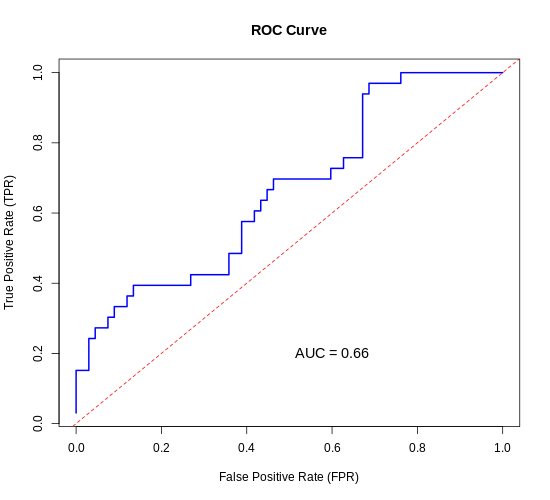

In [ ]:
%%R -h 500 -w 550

# Calculate and plot ROC Curve
roc_data <- data.frame(probability = predicted_probabilities, actual = actual_class)
roc_data <- roc_data[order(-roc_data$probability), ]
TPR <- cumsum(roc_data$actual) / sum(roc_data$actual)
FPR <- cumsum(1 - roc_data$actual) / sum(1 - roc_data$actual)
AUC <- sum((FPR[-1] - FPR[-length(FPR)]) * (TPR[-1] + TPR[-length(TPR)]) / 2)

# Plot ROC Curve
plot(FPR, TPR, type = 'l', col = 'blue', lwd = 2,
     xlab = 'False Positive Rate (FPR)',
     ylab = 'True Positive Rate (TPR)',
     main = 'ROC Curve')
abline(a = 0, b = 1, col = 'red', lty = 2)
text(0.6, 0.2, paste("AUC =", round(AUC, 2)), col = 'black', cex = 1.2)


#### Log-Likelihood and Pseudo-R²

-   ***Log-Likelihood***: A measure of how well the model fits the data. Higher values indicate a better fit.

-   ***Pseudo-R²***: Various metrics (like McFadden’s R², Cox & Snell R²) can be used to measure the goodness of fit for logistic regression models.

In [ ]:
%%R
# Function to calculate Log-Likelihood
log_likelihood_value <- function(params, data) {
  beta_0 <- params[1]
  beta_1 <- params[2]
  beta_2 <- params[3]
  beta_3 <- params[4]
  beta_4 <- params[5]
  beta_5 <- params[6]

  # Linear predictor
  log_odds <- beta_0 + beta_1 * data$x1 + beta_2 * data$x2 +
              beta_3 * data$x3 + beta_4 * data$x4 +
              beta_5 * (data$region == "highland")

  # Predicted probabilities
  probability <- 1 / (1 + exp(-log_odds))

  # Log-Likelihood calculation
  ll <- sum(data$contaminated * log(probability) +
            (1 - data$contaminated) * log(1 - probability))

  return(ll)  # Return Log-Likelihood
}

# Calculate the log-likelihood using the estimated parameters
ll_value <- log_likelihood_value(estimated_params, data)

# Function to calculate Log-Likelihood of null model
null_model_ll <- function(data) {
  p_null <- mean(data$contaminated)  # Proportion of 1s
  ll_null <- sum(data$contaminated * log(p_null) +
                 (1 - data$contaminated) * log(1 - p_null))
  return(ll_null)  # Return Log-Likelihood of null model
}

# Calculate Log-Likelihood for null model
ll_null_value <- null_model_ll(data)

# Calculate Pseudo-R²
pseudo_r2 <- 1 - (ll_value / ll_null_value)

# Output the results
cat("Log-Likelihood of the model:", ll_value, "\n")
cat("Log-Likelihood of the null model:", ll_null_value, "\n")
cat("Pseudo-R²:", pseudo_r2, "\n")

Log-Likelihood of the model: -58.56622 
Log-Likelihood of the null model: -63.41786 
Pseudo-R²: 0.07650273 


#### Cross-Validation

To assess how the model generalizes to an independent dataset, use cross-validation techniques like $k-fold$ cross-validation. This involves splitting the data into $k$ subsets, training the model on $k-1$ subsets, and testing it on the remaining subset. This process is repeated $k$ times, and the performance metrics are averaged.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(42)

# k-Fold Cross-Validation
k <- 5  # Number of folds
folds <- cut(seq(1, n), breaks = k, labels = FALSE)  # Create folds
metrics <- data.frame(accuracy = numeric(k), precision = numeric(k), recall = numeric(k), f1_score = numeric(k))

for (i in 1:k) {
  # Split data into training and validation sets
  validation_indices <- which(folds == i, arr.ind = TRUE)
  validation_set <- data[validation_indices, ]
  training_set <- data[-validation_indices, ]

  # Fit the logistic regression model without using glm
  log_likelihood <- function(params, data) {
    beta_0 <- params[1]
    beta_1 <- params[2]
    beta_2 <- params[3]
    beta_3 <- params[4]
    beta_4 <- params[5]
    beta_5 <- params[6]
    log_odds <- beta_0 + beta_1 * data$x1 + beta_2 * data$x2 + beta_3 * data$x3 + beta_4 * data$x4 + beta_5 * (data$region == "highland")
    probability <- 1 / (1 + exp(-log_odds))
    ll <- sum(data$contaminated * log(probability) + (1 - data$contaminated) * log(1 - probability))
    return(-ll)
  }

  initial_params <- rep(0, 6)
  fit <- optim(par = initial_params, fn = log_likelihood, data = training_set, method = "BFGS", hessian = TRUE)
  estimated_params <- fit$par

  # Predict on the validation set
  predicted_log_odds <- estimated_params[1] + estimated_params[2] * validation_set$x1 +
                        estimated_params[3] * validation_set$x2 +
                        estimated_params[4] * validation_set$x3 +
                        estimated_params[5] * validation_set$x4 +
                        estimated_params[6] * (validation_set$region == "highland")
  predicted_probabilities <- 1 / (1 + exp(-predicted_log_odds))
  predicted_class <- ifelse(predicted_probabilities > 0.5, 1, 0)

  # Create confusion matrix for the current fold
  actual_class <- validation_set$contaminated
  confusion_matrix <- table(Predicted = predicted_class, Actual = actual_class)

  # Calculate performance metrics
  TP <- confusion_matrix[2, 2]  # True Positives
  TN <- confusion_matrix[1, 1]  # True Negatives
  FP <- confusion_matrix[2, 1]  # False Positives
  FN <- confusion_matrix[1, 2]  # False Negatives

  accuracy <- (TP + TN) / sum(confusion_matrix)
  precision <- ifelse(TP + FP == 0, 0, TP / (TP + FP))
  recall <- ifelse(TP + FN == 0, 0, TP / (TP + FN))
  f1_score <- ifelse(precision + recall == 0, 0, 2 * (precision * recall) / (precision + recall))

  # Store the metrics for the current fold
  metrics[i, ] <- c(accuracy, precision, recall, f1_score)
}

# Calculate the average metrics across all folds
average_metrics <- colMeans(metrics)

# Print the results
cat("Average Accuracy:", average_metrics[1], "\n")
cat("Average Precision:", average_metrics[2], "\n")
cat("Average Recall:", average_metrics[3], "\n")
cat("Average F1 Score:", average_metrics[4], "\n")

Average Accuracy: 0.67 
Average Precision: 0.5666667 
Average Recall: 0.3304762 
Average F1 Score: 0.3559019 


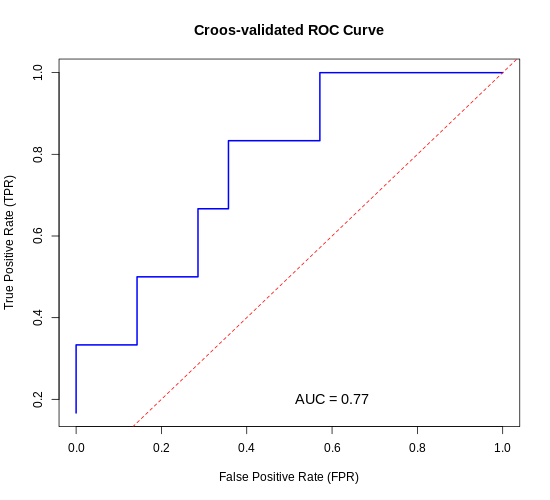

In [ ]:
%%R -h 500 -w 550
# Plot the ROC Curve
roc_data <- data.frame(probability = predicted_class, actual = actual_class)
roc_data <- roc_data[order(-roc_data$probability), ]
TPR <- cumsum(roc_data$actual) / sum(roc_data$actual)
FPR <- cumsum(1 - roc_data$actual) / sum(1 - roc_data$actual)
AUC <- sum((FPR[-1] - FPR[-length(FPR)]) * (TPR[-1] + TPR[-length(TPR)]) / 2)


plot(FPR, TPR, type = 'l', col = 'blue', lwd = 2,
     xlab = 'False Positive Rate (FPR)',
     ylab = 'True Positive Rate (TPR)',
     main = 'Croos-validated ROC Curve')
abline(a = 0, b = 1, col = 'red', lty = 2)
text(0.6, 0.2, paste("AUC =", round(AUC, 2)), col = 'black', cex = 1.2)

## Logistic Model with R

The `glm()` function in R is commonly used to fit generalized linear models, including logistic regression. Here’s a guide on how to fit a logistic regression model with `glm()`.

### Check and Install required R Packages

In [ ]:
%%R
pkg <- c(
		 'devtools',
	   'remotes',
		 'tidyverse',
		 'DataExplorer',
     'plyr',
		 'gt',
		 'gtsummary',
		 'rstatix',
	  'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
     'RColorBrewer',
     'pROC',
     'ROCR',
		 'boot'
      )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(plyr))
library(tidyverse)
library(plyr)
library(gt)
library(rstatix)
library(gtsummary)
library(DataExplorer)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
library(ggpmisc)
library(RColorBrewer)
library(pROC)
library(boot)


### Data

Our goal is to develop a logistic n model to predict paddy soil arsenic class using various irrigation water and soil properties. We have available data of 263 paired groundwater and paddy soil samples from arsenic contaminated areas in Tala Upazilla, Satkhira district, Bangladesh. This data was utilized in on our publication titled "Factors Affecting Paddy Soil Arsenic Concentration in Bangladesh: Prediction and Uncertainty of Geostatistical Risk Mapping" which can be accessed via the this [URL](https://doi.org/10.1016/j.scitotenv.2011.10.008).

Full data set is available for download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [ ]:
%%R
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
glimpse(mf)

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 263
Columns: 29
$ ID              <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Longitude       <dbl> 89.1134, 89.1232, 89.1281, 89.1296, 89.1312, 89.1305, …
$ Latitude        <dbl> 22.7544, 22.7576, 22.7499, 22.7568, 22.7366, 22.7297, …
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WP              <dbl> 0.761, 1.194, 1.317, 1.545, 0.966, 1.058, 0.868, 0.890…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ WEc             <dbl> 1.03, 1.07, 1.40, 0.83, 1.42, 1.82, 1.71, 1.74, 1.57, …
$ WpH             <dbl> 7.03, 7.06, 6.84, 6.8

#### Create a Bbinary Response Variable

The `binary class` typically refers to a classification problem where there are only two possible classes or outcomes. As we see `SAs` is a continuous variable, but we need to convert it into binary class (contaminated and non-contaminated) based on our published paper. The paper suggests that we use the probability of exceeding the upper baseline soil arsenic concentration (14.8 mg/kg) to define soil samples as either As contaminated (`Yes`) or non-contaminated (`No`).

Here we will convert `Soil As (SAs)` into two classes- `Yes = Contaminated`and `No = noncontaminated` and create a new binary response variables (`Class_As`) with two levels:

Yes = `SAs` \> 14.8 mg As/kg

No = `SAs` \< 14.8 mg As/kg

In [ ]:
%%R
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)

#### Box/Violine Plots

We can create a nice looking plots with results of ANOVA and post-hoc tests on the same plot (directly on the boxplots). We will use `gbetweenstats()` function of **ggstatsplot** package:

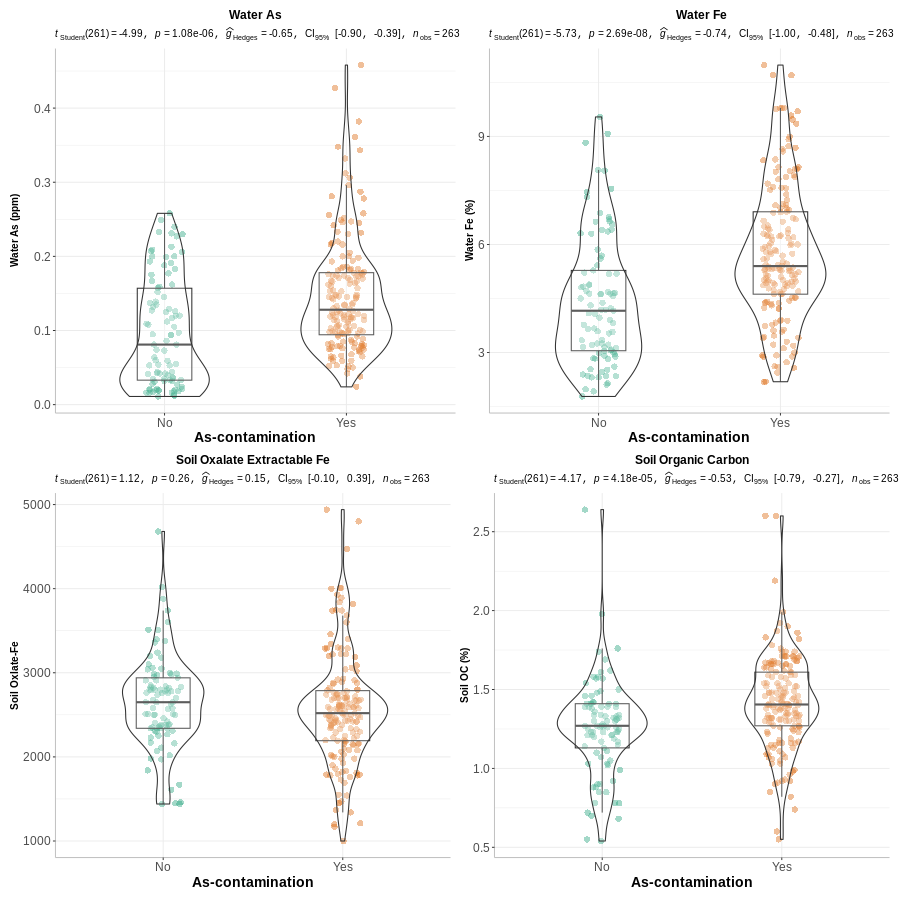

In [ ]:
%%R -w 900 -h 900 -u px
p1<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = WAs,
  ylab = "Water As (ppm)",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Water As") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p2<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = WFe,
  ylab = "Water Fe (%)",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("	Water Fe") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p3<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = SAoFe,
  ylab = "Soil Oxlate-Fe",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Soil Oxalate Extractable Fe") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))


p4<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = SOC,
  ylab = "Soil OC (%)",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Soil Organic Carbon") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))


(p1|p2)/(p3|p4)

#### Data Processing


In [ ]:
%%R
df <- mf |>
  # select variables
  dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As) |>
   # convert to factor
   dplyr::mutate_at(vars(Land_type), funs(factor))  |>
   dplyr::mutate_at(vars(Class_As), funs(factor))  |>
   # normalize the all numerical features
   #dplyr::mutate_at(1:14,  funs((.-min(.))/max(.-min(.)))) |>
   glimpse()


Rows: 263
Columns: 8
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ SAoFe           <dbl> 2500, 2670, 2160, 2500, 2060, 2500, 2520, 2140, 2150, …
$ SOC             <dbl> 1.66, 1.26, 1.36, 1.61, 1.26, 1.74, 1.71, 1.69, 1.41, …
$ Year_Irrigation <dbl> 14, 20, 10, 8, 10, 9, 8, 10, 8, 2, 20, 4, 15, 10, 5, 4…
$ Distance_STW    <dbl> 5, 6, 5, 8, 5, 5, 10, 8, 10, 8, 5, 5, 9, 5, 10, 10, 12…
$ Land_type       <fct> MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL,…
$ Class_As        <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, …


#### Split Data

We will use the `ddply()` function of the **plyr** package to split soil carbon datainto homogeneous subgroups using **stratified random sampling**. This method involves dividing the population into strata and taking random samples from each stratum to ensure that each subgroup is proportionally represented in the sample. The goal is to obtain a representative sample of the population by adequately representing each stratum.


In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(df,.(Land_type, Class_As),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(df, .(Land_type, Class_As),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

Stratified random sampling is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

In [ ]:
%%R
print(prop.table(table(train$Class_As)))
print(prop.table(table(test$Class_As)))


       No       Yes 
0.3551913 0.6448087 

  No  Yes 
0.35 0.65 


### Fit a Logistic Model

We will use **logistic regression** to predict probability of soil As contamination (`Class_As`) based on elevation, year of irrigation, distance from STW, several irrigation water, and soil properties. We will use `glm()` function with `family = binomial(link = "logit"))` for logistic regression. The `Class_As` variable will be used as a response variable, while all the other variables in the `train` will serve as predictors.


In [ ]:
%%R
fit.logit<-glm(Class_As~., data= train,
             family = binomial(link = "logit"))

### Model Summary

The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [ ]:
%%R
summary(fit.logit)


Call:
glm(formula = Class_As ~ ., family = binomial(link = "logit"), 
    data = train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -6.0706181  1.6731924  -3.628 0.000285 ***
WAs             12.6331694  3.6215949   3.488 0.000486 ***
WFe              0.3522814  0.1207831   2.917 0.003538 ** 
SAoFe            0.0002895  0.0003311   0.874 0.381870    
SOC              0.5122031  0.8242187   0.621 0.534310    
Year_Irrigation  0.2950081  0.0633646   4.656 3.23e-06 ***
Distance_STW    -0.0592661  0.0327871  -1.808 0.070668 .  
Land_typeMHL     1.1958251  0.4563288   2.621 0.008779 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 238.12  on 182  degrees of freedom
Residual deviance: 142.73  on 175  degrees of freedom
AIC: 158.73

Number of Fisher Scoring iterations: 6



The summary output of GLM has several components that provide valuable insights into the model's performance. The summary includes information on the call, residuals, and coefficients, which are analogous to the summary of a model fit using the `lm()` function. However, the GLM summary differs from the `lm()` function in providing additional information about the dispersion parameter and deviance values.

The **intercept** represents the `log-odds` of the event happening when all independent variables are set to zero. In some cases, interpreting the intercept might not be meaningful, especially if setting all variables to zero is not a realistic or meaningful scenario in your context.

Each **slope coefficient** represents the change in the `log-odd`s of the event happening for a one-unit change in the corresponding independent variable holding all other variables constant. If the slope is positive, an increase in the corresponding independent variable is associated with an increase in the log-odds of the event happening. If the slope is negative, an increase in the corresponding independent variable is associated with a decrease in the log-odds of the event happening.

The **dispersion parameter** is a scaling factor that accounts for the variance of the response variable and is a crucial component of the GLM models. The deviance values are measures of the model's goodness of fit and are used to assess how well the model fits the observed data.

In cases where quasi-family is not used, the dispersion value is set to 1. This value indicates that the model's variance equals the mean and performs adequately. By understanding the summary output of a GLM model, we can make informed decisions about the model's performance and take the necessary steps to improve its accuracy.


`summ()` function of {jtools}  produce summary table of regression models:

In [ ]:
%%R
jtools::summ(fit.logit)

MODEL INFO:
Observations: 183
Dependent Variable: Class_As
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

MODEL FIT:
χ²(7) = 95.39, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.56
Pseudo-R² (McFadden) = 0.40
AIC = 158.73, BIC = 184.41 

Standard errors:MLE
----------------------------------------------------
                         Est.   S.E.   z val.      p
--------------------- ------- ------ -------- ------
(Intercept)             -6.07   1.67    -3.63   0.00
WAs                     12.63   3.62     3.49   0.00
WFe                      0.35   0.12     2.92   0.00
SAoFe                    0.00   0.00     0.87   0.38
SOC                      0.51   0.82     0.62   0.53
Year_Irrigation          0.30   0.06     4.66   0.00
Distance_STW            -0.06   0.03    -1.81   0.07
Land_typeMHL             1.20   0.46     2.62   0.01
----------------------------------------------------


### Interpretation of Logistic Model

We can use `reoprt()` function of {report} package to further explain the `fit.glm` object.

In [ ]:
%%R
report::report(fit.logit)

We fitted a logistic model (estimated using ML) to predict Class_As with WAs,
WFe, SAoFe, SOC, Year_Irrigation, Distance_STW and Land_type (formula: Class_As
~ WAs + WFe + SAoFe + SOC + Year_Irrigation + Distance_STW + Land_type). The
model's explanatory power is substantial (Tjur's R2 = 0.46). The model's
intercept, corresponding to WAs = 0, WFe = 0, SAoFe = 0, SOC = 0,
Year_Irrigation = 0, Distance_STW = 0 and Land_type = HL, is at -6.07 (95% CI
[-9.59, -2.99], p < .001). Within this model:

  - The effect of WAs is statistically significant and positive (beta = 12.63,
95% CI [5.95, 20.21], p < .001; Std. beta = 1.06, 95% CI [0.50, 1.69])
  - The effect of WFe is statistically significant and positive (beta = 0.35, 95%
CI [0.13, 0.60], p = 0.004; Std. beta = 0.71, 95% CI [0.26, 1.22])
  - The effect of SAoFe is statistically non-significant and positive (beta =
2.90e-04, 95% CI [-3.54e-04, 9.52e-04], p = 0.382; Std. beta = 0.19, 95% CI
[-0.23, 0.62])
  - The effect of SOC is statisti

### Model Performance

In [ ]:
%%R
performance::model_performance(fit.logit)

# Indices of model performance

AIC     |    AICc |     BIC | Tjur's R2 |  RMSE | Sigma | Log_loss | Score_log | Score_spherical |   PCP
--------------------------------------------------------------------------------------------------------
158.731 | 159.559 | 184.407 |     0.456 | 0.354 | 1.000 |    0.390 |      -Inf |           0.011 | 0.751


**`Tjur's R²`**, also known as Tjur's coefficient of discrimination, is a measure of discrimination or predictive accuracy for binary outcomes in logistic regression. It assesses how well the model distinguishes between the two categories of the dependent variable. Tjur's R² is defined as the difference in the average predicted probabilities of the two outcomes.

The formula for Tjur's R² is as follows:

$$ R^2_{Tjur} = P(Y=1|\hat{Y}=1) - P(Y=0|\hat{Y}=1) $$

Here:

-   $P(Y=1|\hat{Y}=1)$ is the probability of the actual outcome being 1 given that the predicted outcome is 1.

-   $P(Y=0|\hat{Y}=1)$ is the probability of the actual outcome being 0 given that the predicted outcome is 1.

Tjur's R² ranges from -1 to 1, where a higher value indicates better discrimination. A positive value suggests that the model is better at predicting the positive class, while a negative value suggests better prediction for the negative class.

In practice, Tjur's R² is not as commonly used as other metrics like the area under the ROC curve (AUC) or the Brier score, but it provides a measure of the practical significance of the logistic regression model in terms of discrimination. Keep in mind that the interpretation of Tjur's R² should be done in the context of the specific dataset and problem you are working on.

**`Log_loss`**: Logarithmic Loss (Log Loss), also known as cross-entropy loss, is a commonly utilized loss function in machine learning, particularly in classification problems. It measures the performance of a classification model that outputs a probability value ranging from 0 to 1. Due to its versatility and capability to handle prediction errors, Logarithmic Loss is often preferred over alternative loss functions. Its formulation is mathematically rigorous, and its implementation is straightforward, making it an essential tool for any machine learning practitioner.

The formula for Log Loss is:

$$ {Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

Where:

\- $N$ is the number of samples in the dataset.

\- $y_i$ is the true label for the $i$ th sample (0 or 1 for binary classification, or one-hot encoded vectors for multiclass classification).

-   $p_i$ is the predicted probability that the $i$ th sample belongs to the positive class.

**`Score_spherical`**: A proper scoring rule is a mathematical function used to assess the accuracy of probabilistic predictions made by a model. It is called proper because it is designed to maximize the expected score when the model's predictions align with the actual probabilities of the outcomes.

**`PCP`**: Percentage of Correct Predictions (PCP), also known as accuracy, is a common evaluation metric for models with binary outcomes. It measures the proportion of correctly predicted instances out of the total number of instances.
:::

### Visualization of Model Assumptions

The package {performance} provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`.

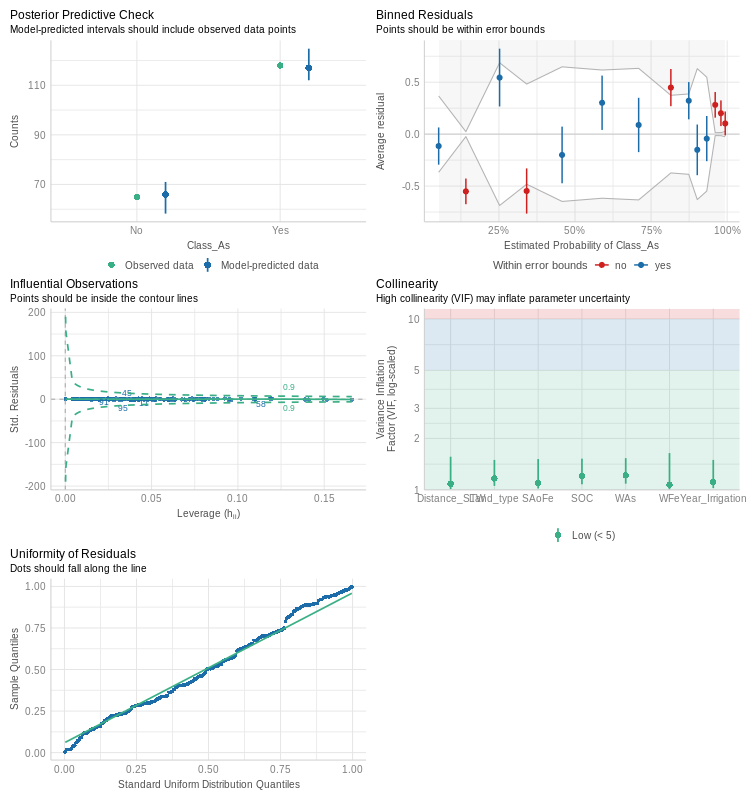

In [ ]:
%%R -w 750 -h 800 -u px
performance::check_model(fit.logit)

### The Logistic Distribution of Intercept and Slopes

The `plogis()` function is used to calculate the logistic cumulative distribution function (CDF) of Intercept and Slopes. The logistic CDF is the probability that a logistic random variable is less than or equal to a specified value. The `plogis()` function takes a numeric vector of values and returns the corresponding probabilities.

The `plogis()` function is particularly useful in the context of logistic regression, where you might be interested in converting log-odds into probabilities. If you have a logistic regression model with coefficients (intercept and slopes), you can use the logistic function and `plogis` to calculate probabilities.

In [ ]:
%%R
## Intercept
intercept = coef(fit.logit)[1]
# Back-transform the  Slope of WAs
slop_was = coef(fit.logit)[2]
log_odds<-intercept + (slop_was*train$WAs)
probabilities <- plogis(log_odds)
age.prob<-data.frame(WAs = train$WAs, LogOdds = log_odds, Probability = probabilities) |>
  glimpse()

Rows: 183
Columns: 3
$ WAs         <dbl> 0.019, 0.043, 0.037, 0.126, 0.019, 0.020, 0.207, 0.016, 0.…
$ LogOdds     <dbl> -5.830588, -5.527392, -5.603191, -4.478839, -5.830588, -5.…
$ Probability <dbl> 0.002927753, 0.003960598, 0.003672546, 0.011219281, 0.0029…


### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.

If we want the marginal effects for "Land_types", you may use `margins()` function of {margins} package:

In [ ]:
%%R
margins::margins(fit.logit, variables = "WAs")

  WAs
 1.57


we get the same marginal effect using `avg_slopes()` function from the {marginaleffects} package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.logit, variables = "WAs")


 Estimate Std. Error    z Pr(>|z|)    S 2.5 % 97.5 %
     1.57      0.396 3.96   <0.001 13.7 0.794   2.35

Term: WAs
Type:  response 
Comparison: mean(dY/dX)
Columns: term, contrast, estimate, std.error, statistic, p.value, s.value, conf.low, conf.high, predicted_lo, predicted_hi, predicted 



To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

In [ ]:
%%R
effect<-ggeffects::predict_response(fit.logit, "WAs", margin = "empirical")
effect

  plots.



# Average predicted probabilities of Class_As

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.36 | 0.17, 0.59
0.20 |      0.87 | 0.77, 0.94
0.40 |      0.99 | 0.92, 1.00
0.60 |      1.00 | 0.97, 1.00



The marginal effects of "MHL", relative to "HL" is:

In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 0.5179228


{ggeffects} supports labelled data and the `plot()` method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

  plots.



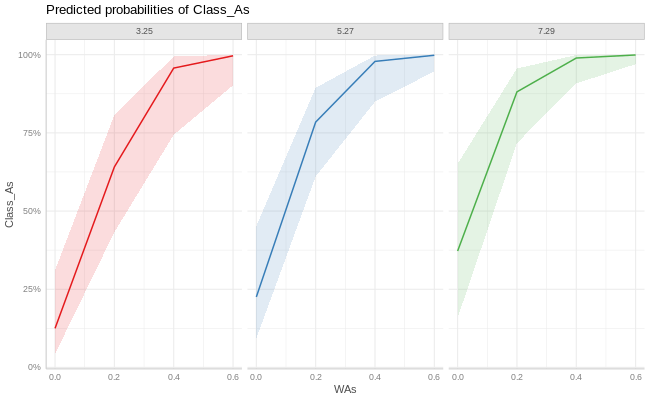

In [ ]:
%%R -w 650 -h 400 -u px
was.wfe <- predict_response(fit.logit, terms = c("WAs", "WFe"))
plot(was.wfe, facets = TRUE)

In [ ]:
%%R
was.year.wfe<- predict_response(fit.logit, terms = c("WAs", "Year_Irrigation", "WFe"))
was.year.wfe

  plots.



# Predicted probabilities of Class_As

Year_Irrigation: 2.7
WFe: 3.25

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.04 | 0.01, 0.13
0.20 |      0.32 | 0.16, 0.54
0.40 |      0.86 | 0.45, 0.98
0.60 |      0.99 | 0.73, 1.00

Year_Irrigation: 2.7
WFe: 5.27

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.07 | 0.02, 0.21
0.20 |      0.49 | 0.30, 0.69
0.40 |      0.92 | 0.62, 0.99
0.60 |      0.99 | 0.84, 1.00

Year_Irrigation: 2.7
WFe: 7.29

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.14 | 0.04, 0.36
0.20 |      0.66 | 0.42, 0.84
0.40 |      0.96 | 0.75, 1.00
0.60 |      1.00 | 0.91, 1.00

Year_Irrigation: 7.2
WFe: 3.25

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.13 | 0.04, 0.31
0.20 |      0.64 | 0.43, 0.81
0.40 |      0.96 | 0.74, 0.99
0.60 |      1.00 | 0.90, 1.00

Year_Irrigation: 7.2
WFe: 5.27

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.23 

`geom_smooth()` using formula = 'y ~ x'


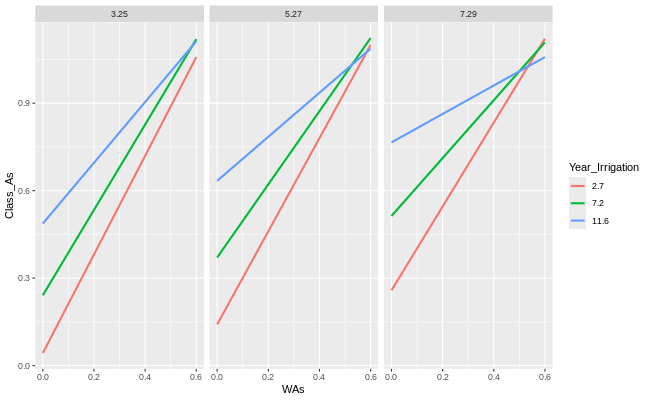

In [ ]:
%%R -w 650 -h 400 -u px
# select specific levels for grouping terms
ggplot(was.year.wfe, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = get_y_title(was.year.wfe),
    x = get_x_title(was.year.wfe),
    colour = get_legend_title(was.year.wfe)
  )

`effect_plot()` function of **jtools** package plot simple effects in logitic regression models:

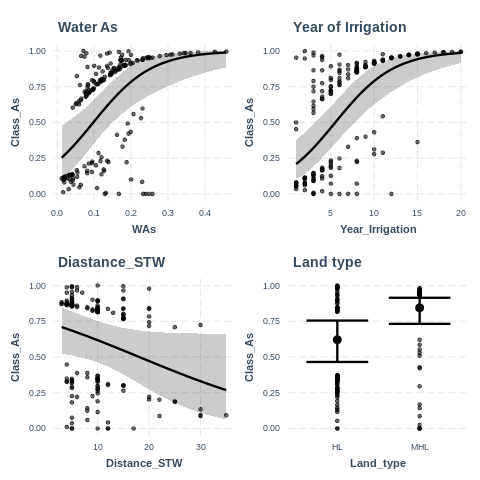

In [ ]:
%%R
p1<-jtools::effect_plot(fit.logit,
                    main.title = "Water As",
                    pred = WAs,
                    interval = TRUE,
                    partial.residuals = TRUE)
p2<-jtools::effect_plot(fit.logit,
                    main.title = "Year of Irrigation ",
                    pred = Year_Irrigation,
                    interval = TRUE,
                    partial.residuals = TRUE)
p3<-jtools::effect_plot(fit.logit,
                    main.title = "Diastance_STW",
                    pred = Distance_STW ,
                    interval = TRUE,
                    partial.residuals = TRUE)
p4<-jtools::effect_plot(fit.logit,
                    main.title = "Land type",
                    pred = Land_type,
                    interval = TRUE,
                    partial.residuals = TRUE)
library(patchwork)
(p1+p2)/(p3 +p4)

### Cross-validation



#### k-fold cross-validation

The {boot} package’s `cv.glm()` function provides an easy way to do `k-fold cross-validation` on GLM models. Here first we fit GLM model for entire dataset then we apply `cv.glm()` on fitted glm object.

In [ ]:
%%R
## Define cost function (for misclassification error)
cost <- function(r, pi) {
  # Convert predicted probabilities to binary predictions
  predictions <- ifelse(pi > 0.5, 1, 0)
  # Calculate the misclassification error
  mean(predictions != r)
}

fit.logit.mf<-glm(Class_As~., data= mf,
             family = binomial(link = "logit"))
cv_result <- cv.glm(data = mf, glmfit = fit.logit.mf, K = 5, cost = cost)

# Print cross-validation error
print(cv_result$delta)

[1] 0.05323194 0.04259133


However, this `cv.glm()` function does not directly provide predicted classes for each observation in the test folds; it only provides the `cross-validated error` estimates. However, we can achieve this by manually implementing k-fold cross-validation and storing the predictions for each fold.

In [ ]:
%%R
# Custom cross-validation function to get predicted classes
cross_validation_glm_predictions <- function(formula, data, k = 5, family = binomial, seed = 123) {
  set.seed(seed)

  n <- nrow(data)
  folds <- sample(rep(1:k, length.out = n))

  # Initialize a vector to store predicted probabilities
  all_probabilities <- numeric(n)

  for (i in 1:k) {
    train_data <- data[folds != i, ]
    test_data <- data[folds == i, ]

    # Fit GLM model
    model <- glm(formula = formula, data = train_data, family = family)

    # Predict probabilities for the test set
    test_probabilities <- predict(model, newdata = test_data, type = "response")

    # Store probabilities in the correct positions
    all_probabilities[folds == i] <- test_probabilities
  }

  return(all_probabilities)
}

# cress-validation
predicted_prob <- cross_validation_glm_predictions(
  formula = Class_As ~ WAs + WFe +  SAoFe + SOC + Year_Irrigation + Distance_STW + Land_type,
  data = mf,
  k = 5,
  family = binomial
)


#### Cross-validation Performance

In [ ]:
%%R
## predicted class
predicted_classes<-ifelse(predicted_prob  > 0.5, 1 ,0)
# actual class
actual_classes<-ifelse(mf$Class_As=="Yes", 1, 0)
# Calculate True Positives, False Positives, True Negatives, False Negatives
TP <- sum(actual_classes == 1 & predicted_classes == 1)
FP <- sum(actual_classes == 0 & predicted_classes == 1)
TN <- sum(actual_classes == 0 & predicted_classes == 0)
FN <- sum(actual_classes == 1 & predicted_classes == 0)

# Calculate Accuracy
accuracy <- (TP + TN) / (TP + FP + TN + FN)

# Calculate Precision
precision <- TP / (TP + FP)

# Calculate Recall
recall <- TP / (TP + FN)

# Calculate F1 Score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Display results
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.7984791 
Precision: 0.8232044 
Recall: 0.8764706 
F1 Score: 0.8490028 


#### ROC Curve

The ROC analysis can easily be performed using `roc()` function of {pROC} package.

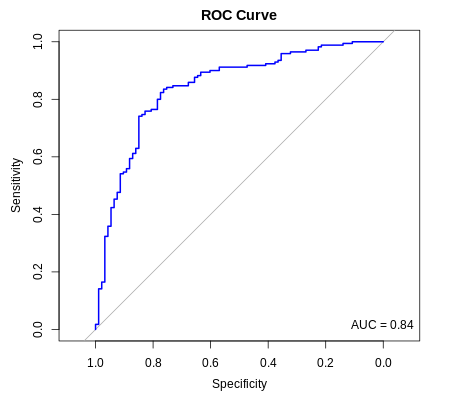

In [ ]:
%%R -w 450 -h 400 -u px

# compute ROC
roc_curve <- roc(actual_classes, predicted_prob )

# Plot the ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2)

# Add AUC to the plot
auc_value <- auc(roc_curve)
legend("bottomright", legend = paste("AUC =", round(auc_value, 2)), bty = "n")

### Prediction at test locations

The `predict()` function for logistic models returns the default predictions of log-odds, which are probabilities on the logit scale. When type = `response`, the function provides the predicted probabilities.



In [ ]:
%%R
test$Pred_prob<-predict(fit.logit, test, type = "response")
# setting the cut-off probability
test$Pred_Class<- ifelse(test$Pred_prob > 0.5,"Yes","No")

In [ ]:
%%R
ggpredict(fit.logit, terms = "WAs[0:0.50 by = 0.05]")

# Predicted probabilities of Class_As

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.23 | 0.09, 0.45
0.05 |      0.35 | 0.20, 0.55
0.15 |      0.66 | 0.50, 0.79
0.20 |      0.78 | 0.61, 0.89
0.25 |      0.87 | 0.69, 0.95
0.30 |      0.93 | 0.76, 0.98
0.35 |      0.96 | 0.81, 0.99
0.50 |      0.99 | 0.91, 1.00

Adjusted for:
*             WFe =    5.27
*           SAoFe = 2576.72
*             SOC =    1.35
* Year_Irrigation =    7.19
*    Distance_STW =    9.77
*       Land_type =      HL


Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



#### Confusion Matrix at 50% Cut-Off Probability

Now, we classified an sites in the test data set with a probability of As contamination is greater than 0.5, as `Yes`, otherwise `No`.




In [ ]:
%%R
# Confusion matrix, proportion of cases
confusion_matrix = table(Actual = test$Class_As, Predicted =test$Pred_Class)
confusion_matrix

      Predicted
Actual No Yes
   No  17  11
   Yes  9  43




#### Prediction Performance

In [ ]:
%%R
# define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.75 
Precision: 0.8269231 
Recall: 0.7962963 
Specificity: 0.6538462 
F1 Score: 0.8113208 


#### ROC Curve


The ROC analysis can be easily performed using `roc()` of {pROC} package.

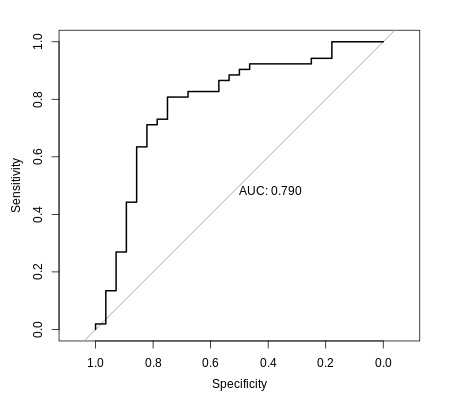

In [ ]:
%%R -w 450 -h 400 -u px
# Compute roc
res.roc <- pROC::roc(test$Class_As, test$Pred_prob)
plot.roc(res.roc, print.auc = TRUE)

On a graph, the gray diagonal line represents a classifier's performance that is no better than random chance. In contrast, a high-performing classifier will exhibit a ROC curve that rises steeply towards the top-left corner. This indicates that it can correctly identify a large number of positives without misclassifying many negatives. The AUC metric is commonly used to evaluate the performance of a classifier. An AUC value close to 1, which is the maximum possible value, is indicative of a highly effective classifier. In this case, our classifier exhibits an AUC value of 0.79, suggesting that it is indeed good. By contrast, a classifier that performs no better than random chance would have an AUC value of 0.5 when assessed using an independent test set that was not used for training the model.

In [ ]:
%%R
# Extract some interesting results
roc.data <-tibble(
  thresholds = res.roc$thresholds,
  sensitivity = res.roc$sensitivities,
  specificity = res.roc$specificities
)
# Get the probability threshold for specificity = 0.5
roc.data  |>
  filter(specificity >= 0.5)

# A tibble: 62 × 3
   thresholds sensitivity specificity
        <dbl>       <dbl>       <dbl>
 1      0.333       0.904       0.5  
 2      0.364       0.885       0.5  
 3      0.374       0.885       0.536
 4      0.391       0.865       0.536
 5      0.405       0.865       0.571
 6      0.416       0.846       0.571
 7      0.437       0.827       0.571
 8      0.478       0.827       0.607
 9      0.513       0.827       0.643
10      0.524       0.827       0.679
# ℹ 52 more rows
# ℹ Use `print(n = ...)` to see more rows


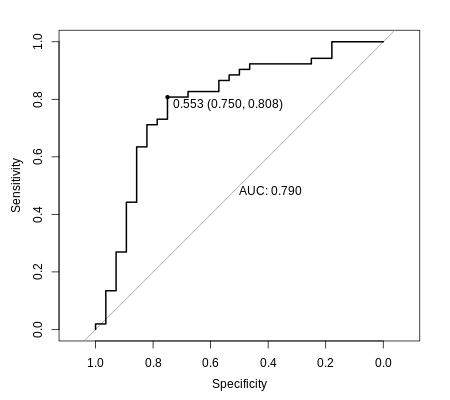

In [ ]:
%%R -w 450 -h 400 -u px
plot.roc(res.roc, print.auc = TRUE, print.thres = "best")

In [ ]:
%%R
rm(list=ls())

## Summary and Conclusion

This tutorial explains how to apply logistic regression to perform binary classification in R. It covers data preparation, model fitting, evaluation, and interpretation of results. It also provides insights into interpreting the coefficients of the logistic regression model and discusses potential challenges. By following this tutorial, readers can gain a solid understanding of logistic regression analysis in R.

Using logistic regression in R, researchers and data analysts can make informed decisions, identify important factors influencing binary outcomes, and gain insights into the relationships between predictors and outcome probabilities.


## References

1.  [How to Perform Logistic Regression in R](https://www.statology.org/logistic-regression-in-r/)

2.  [Evaluation of Classification Model Accuracy: Essentials](http://www.sthda.com/english/articles/36-classification-methods-essentials/143-evaluation-of-classification-model-accuracy-essentials/)

3.  [Precision, Recall and F1-Score using R](https://www.geeksforgeeks.org/precision-recall-and-f1-score-using-r/)

4.  [Chapter 6 Binary Logistic Regression](https://www.bookdown.org/rwnahhas/RMPH/blr.html)

5.  [Chapter 10 Binary Logistic Regression](https://bookdown.org/chua/ber642_advanced_regression/binary-logistic-regression.html)

6.  R Online Manual: [glm](http://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html)

7.  [Applied Logistic Regression (Second Edition)](https://stats.oarc.ucla.edu/examples/alr2/) by David Hosmer and Stanley Lemeshow

8.  [Stat Books for Loan, Logistic Regression and Limited Dependent Variables](https://stats.oarc.ucla.edu/books/#Logistic%20Regression%20and%20Related%20Methods)



